## Cryptocurrency Returns - EDA
** CS109b ** <br>
** Group #5 ** <br>
** Ali Dastjerdi, Angelina Massa, Sachin Mathur & Nate Stein ** <br>
GitHub repo: https://github.com/nate-stein/crypto-ml <br>

In [15]:

import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import numpy as np
import pandas as pd
from scipy import stats
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
%matplotlib inline

import crypto_utils as crypu
from eda_utils import *

import warnings
warnings.filterwarnings('ignore')

### Data Aggregation

The first step is to aggregate data.<br>
To start only the BitCoin and LiteCoin crypto currencies are used as they have early start dates. <br>
Data from an additional 30 sources is aggregated using the date <br>
Additional data sources are listed in data/file_info.csv <br>

In [16]:
p = aggregate_data("./data/file_info.csv")

### Looking at missing values

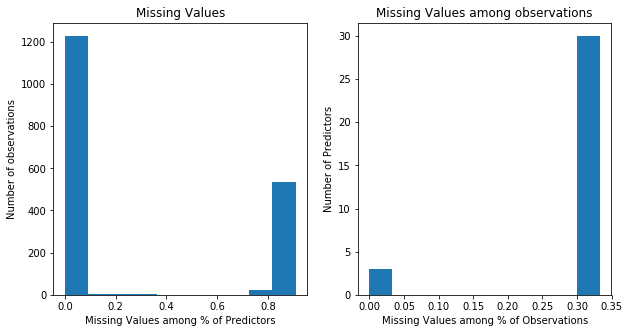

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
missing_val_plot(p, ax1, ax2)

Many predictors have missing values - about 30 predictors have missing values in ~30% of data <br>
One of the reasons is the bitcoin is traded during weekends <br>
Removing observations on Saturday and Sunday

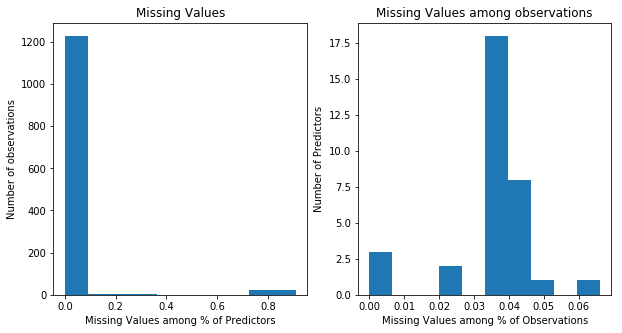

In [18]:
p['date'] = pd.to_datetime(p['date'])
#Extracting date
p['day'] = p['date'].dt.weekday_name
#Remove Saturday and Sunday Observations
p = p[~ p.day.isin(['Saturday','Sunday'])]
p.drop(['day'], axis=1,inplace=True)

#Plotting missing values
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
missing_val_plot(p, ax1, ax2)

After removing observations on Saturday and Sunday, there is very little missing data.<br>
Proceeding to impute values.
### Imputation
Since it is a time series, using forward imputation -previous day's value for missing value

In [19]:
df = impute_val(p)
df.head()

,date,BTC,LTC,DCOILWTICO,DCOILBRENTEU,DHHNGSP,GOLDPMGBD228NLBM,DHOILNYH,DTWEXB,DEXUSEU,...,VXOCLS,GVZCLS,VXDCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225
0,2013-04-29,144.54,4.38,94.09,102.88,4.28,1467.50,2.665,99.7738,1.3090,...,12.70,23.16,12.36,15.32,35.48,24.87,8.67,22.70,20.41,13860.86
1,2013-04-30,139.00,4.30,93.22,101.53,4.30,1469.00,2.623,99.5103,1.3168,...,12.54,22.09,12.21,15.34,34.29,24.76,8.68,21.93,20.02,13860.86
2,2013-05-01,116.99,3.80,90.74,98.34,4.31,1454.75,2.604,99.5764,1.3192,...,13.79,22.93,13.02,16.00,36.62,25.83,8.73,23.28,20.98,13799.35
3,2013-05-02,105.21,3.37,93.70,100.32,4.28,1469.25,2.718,99.7497,1.3066,...,12.89,22.06,12.25,15.19,33.73,24.43,8.75,22.66,20.74,13694.04
4,2013-05-03,97.75,3.04,95.25,104.60,3.98,1469.25,2.731,99.6402,1.3112,...,12.16,20.37,11.67,14.66,32.09,25.68,7.99,21.61,20.22,13694.04


### Normalization
The data is at different scales for variables, so normalizing every variable to be in the [0,1] interval <br>
The Min-Max scalar is used for normalization

In [20]:
df = norm_minmax(df)

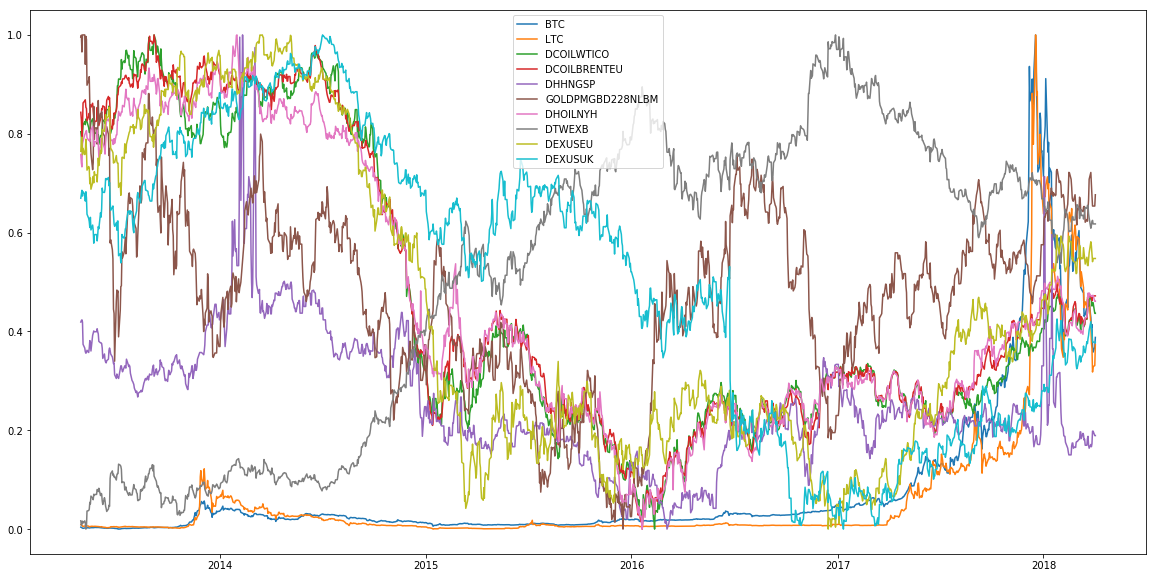

In [21]:
#Plotting first 10 variables
plt.figure(figsize=(20,10))
var = df.columns.tolist()
var.remove('date')
for i in range(0,10):
    plt.plot(df['date'],df[var[i]],label=var[i])

plt.legend(loc=9)

### Correlation Analysis
Plotting correlations among variables

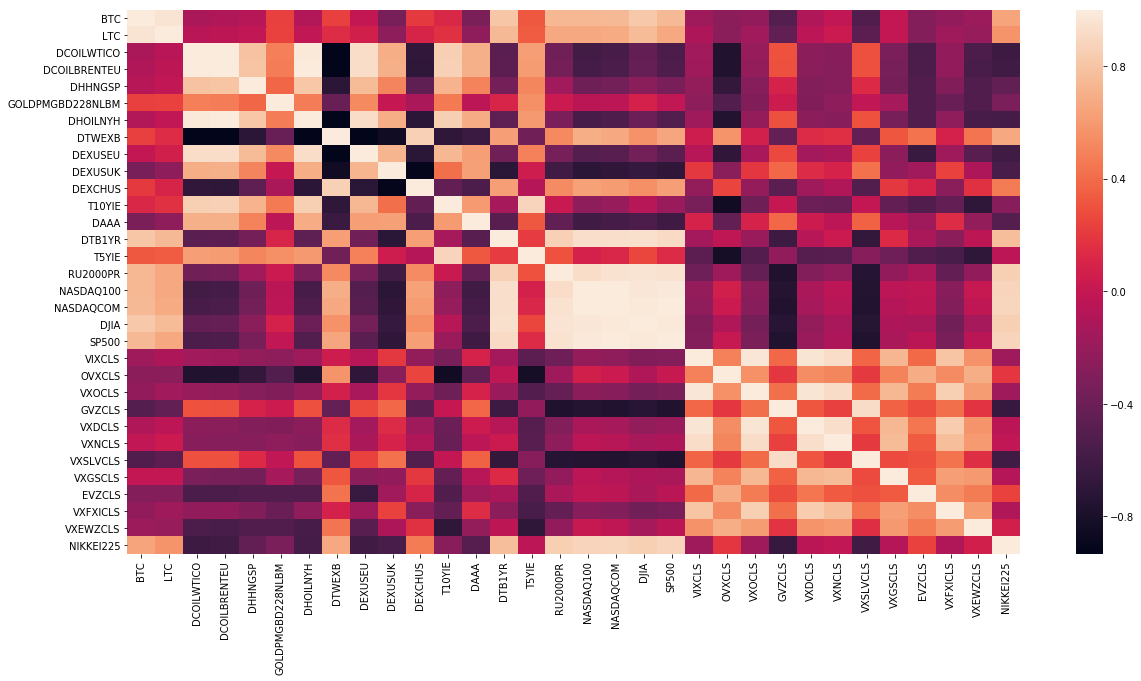

In [22]:
plt.figure(figsize=(20,10))
corr = df[var].corr()
cor = corr
sns.heatmap(cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values)

There are many predictors that are highly correlated <br>
Looking at the correlations <br>

In [23]:
cor.loc[:,:] =  np.tril(cor, k=-1)
cor = cor.stack()
cor[abs(cor) > 0.9]

LTC           BTC             0.956903
DCOILBRENTEU  DCOILWTICO      0.993829
DHOILNYH      DCOILWTICO      0.984753
              DCOILBRENTEU    0.994004
DTWEXB        DCOILWTICO     -0.925801
              DCOILBRENTEU   -0.932480
              DHOILNYH       -0.931834
DEXUSEU       DCOILWTICO      0.925665
              DCOILBRENTEU    0.931556
              DHOILNYH        0.930320
              DTWEXB         -0.928250
DEXCHUS       DEXUSUK        -0.911424
NASDAQ100     DTB1YR          0.938058
              RU2000PR        0.930233
NASDAQCOM     DTB1YR          0.933524
              RU2000PR        0.949534
              NASDAQ100       0.998108
DJIA          DTB1YR          0.944836
              RU2000PR        0.957803
              NASDAQ100       0.971788
              NASDAQCOM       0.977377
SP500         DTB1YR          0.915711
              RU2000PR        0.953294
              NASDAQ100       0.991276
              NASDAQCOM       0.993640
              DJIA       

In [24]:
#Examining Correlations with BitCoin
print(corr.BTC[1:])

LTC                 0.956903
DCOILWTICO         -0.122152
DCOILBRENTEU       -0.099160
DHHNGSP            -0.062860
GOLDPMGBD228NLBM    0.232851
DHOILNYH           -0.080134
DTWEXB              0.223979
DEXUSEU            -0.007564
DEXUSUK            -0.340424
DEXCHUS             0.203120
T10YIE              0.117153
DAAA               -0.323361
DTB1YR              0.809775
T5YIE               0.327216
RU2000PR            0.737049
NASDAQ100           0.740325
NASDAQCOM           0.748314
DJIA                0.822885
SP500               0.744303
VIXCLS             -0.173412
OVXCLS             -0.246601
VXOCLS             -0.225334
GVZCLS             -0.507032
VXDCLS             -0.091085
VXNCLS             -0.012268
VXSLVCLS           -0.530441
VXGSCLS            -0.011393
EVZCLS             -0.289407
VXFXICLS           -0.226368
VXEWZCLS           -0.183866
NIKKEI225           0.646616
Name: BTC, dtype: float64


In [25]:
#Making a copy of the imputed and normalized dataframe before dropping variables
df0 = df.copy()
#Removing variables that are highly correlated abs(corr) >0.95 excepy DJIA as it is highly correlated with BTC
x = ['DCOILBRENTEU','DHOILNYH','NASDAQCOM','RU2000PR','NASDAQ100','VXOCLS','VXDCLS']
df.drop(x, axis=1, inplace=True)
var = df.columns.tolist()
var.remove('date')

 Plotting predictors that have correlation of >0.5 with Bitcoin

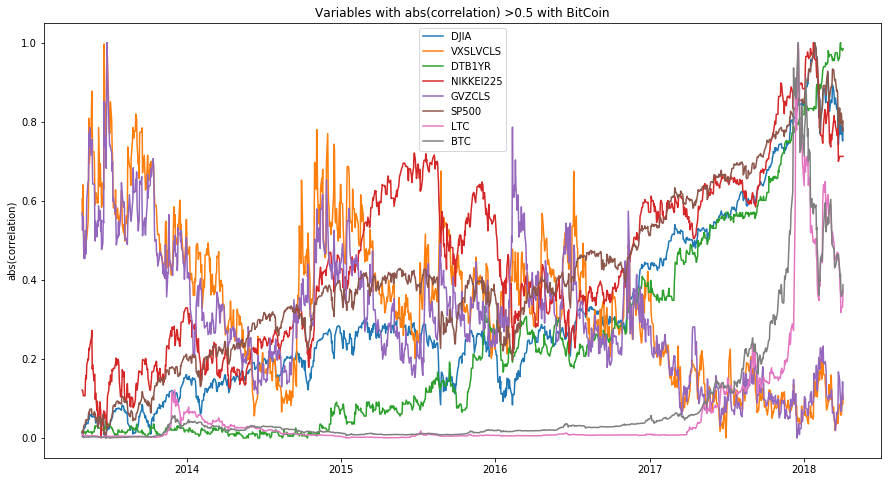

In [26]:
x = corr[abs(corr.BTC)>0.5].index.tolist()
x = list(set(x) & set(df.columns.tolist()))
x.append('BTC')
plt.figure(figsize=(15,8))
for i in x:
    plt.plot(df['date'],df[i],label=i)

plt.title('Variables with abs(correlation) >0.5 with BitCoin')
plt.ylabel('abs(correlation)')
plt.legend(loc=9)

Eventhough the correlations of variables with Bitcoin appear high, the patterns are quite different.

### PCA
Looking for variables that account for most variance. <br>

In [27]:
p = df.drop(['date'],axis=1)
pca = PCA(n_components=5)
pca.fit(p)
p_pca = pca.transform(p)
print("first three principal components explained variance ratio = %0.3f" % np.sum(pca.explained_variance_ratio_))
#pca.explained_variance_
pca_df = pd.DataFrame(pca.components_).transpose()
pca_df.columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5']
pca_df.index = var
pca_df

first three principal components explained variance ratio = 0.908


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
BTC,-0.078179,-0.216131,0.295984,0.145866,0.011596
LTC,-0.051472,-0.184189,0.290492,0.137819,0.031308
DCOILWTICO,0.349312,-0.175941,-0.059655,0.041625,0.116898
DHHNGSP,0.121759,-0.090644,-0.051849,-0.022116,-0.006995
GOLDPMGBD228NLBM,0.079940,-0.185748,-0.137936,0.430614,-0.200288
DTWEXB,-0.383874,0.062940,-0.099320,-0.021304,0.147770
DEXUSEU,0.360167,-0.193129,0.133241,0.243752,-0.117030
DEXUSUK,0.323849,0.112992,0.345215,-0.260886,-0.164593
DEXCHUS,-0.322462,-0.090695,-0.480225,0.127720,0.126307
T10YIE,0.197630,-0.260769,-0.054431,-0.118463,0.316054


The first principal component explains ~54% variatiation in the dataset. <br>
There is a lot of variability in the dataset given variables from different economic aspects. <br>
The second and third prinicipal components has higher coefficients for the crypto currencies indicating most of the variability in the dataset is from other variables

### Dataset Preparation for Prediction
Since the aim is to use data of a given day to predict the direction of price movement (UP (Yes) else No) of BTC/LTC for the next day, data needs to be suitably formatted. <br>
Alternatively, a bunch of crypto currencies can be checked if they are a leading indicator for the price movement of one.

In [28]:
df.head(10)

,date,BTC,LTC,DCOILWTICO,DHHNGSP,GOLDPMGBD228NLBM,DTWEXB,DEXUSEU,DEXUSUK,DEXCHUS,...,VIXCLS,OVXCLS,GVZCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225
0,2013-04-29,0.003996,0.009015,0.804217,0.418919,0.995832,0.016821,0.764358,0.669507,0.135650,...,0.144620,0.138669,0.570183,0.153493,0.604027,0.251153,0.384170,0.175710,0.042907,0.121201
1,2013-04-30,0.003705,0.008791,0.793912,0.421922,0.999405,0.007926,0.786318,0.677828,0.135650,...,0.138608,0.156197,0.525748,0.154105,0.565996,0.247982,0.385135,0.157931,0.035786,0.121201
2,2013-05-01,0.002550,0.007391,0.764539,0.423423,0.965464,0.010158,0.793074,0.685556,0.135650,...,0.169304,0.188925,0.560631,0.174326,0.640460,0.278835,0.389961,0.189102,0.053314,0.115934
3,2013-05-02,0.001931,0.006187,0.799597,0.418919,1.000000,0.016008,0.757601,0.673866,0.126171,...,0.140823,0.154956,0.524502,0.149510,0.548098,0.238466,0.391892,0.174786,0.048932,0.106917
4,2013-05-03,0.001539,0.005263,0.817956,0.373874,1.000000,0.012311,0.770552,0.682584,0.125626,...,0.117405,0.147510,0.454319,0.133272,0.495686,0.274510,0.318533,0.150543,0.039438,0.106917
5,2013-05-06,0.002303,0.006187,0.824470,0.366366,1.000000,0.016646,0.757883,0.677630,0.137612,...,0.111392,0.165348,0.454319,0.131434,0.472036,0.279988,0.347490,0.158393,0.037064,0.106917
6,2013-05-07,0.002261,0.006075,0.818311,0.358859,0.940455,0.011883,0.762950,0.663761,0.123883,...,0.116772,0.153250,0.524917,0.121324,0.514222,0.253460,0.339768,0.133687,0.026840,0.148548
7,2013-05-08,0.002370,0.006299,0.829681,0.355856,0.997023,0.000000,0.788851,0.682584,0.109828,...,0.111392,0.126260,0.465532,0.128064,0.494407,0.233276,0.331081,0.141076,0.028118,0.157577
8,2013-05-09,0.002323,0.006327,0.827905,0.357357,0.991068,0.003764,0.768581,0.670497,0.098496,...,0.126266,0.135567,0.506229,0.128064,0.498562,0.228374,0.365830,0.150773,0.036516,0.149511
9,2013-05-10,0.002561,0.006383,0.824588,0.361862,0.898178,0.036472,0.726351,0.637210,0.110373,...,0.109177,0.129207,0.602990,0.123468,0.508150,0.226644,0.390927,0.145463,0.046193,0.185136


In [30]:
#Checking consecutive values to determine if BTC has gone up (1) or not (0)
x = df['BTC'].tolist()
x1 = [j-x[i-1] for i,j in enumerate(x) if i>0]
y = []
for i in x1:
    if i>0:
        y.append(1)
    else:
        y.append(0)
#Remove first row
df1 = df[:-1]
df1['y'] = y
df1.drop(columns=['date'],axis=1,inplace=True)
#Keeping BTC price

df1.head()
lm = int(np.floor(df.shape[0]*0.9))
df1.head(10)



,BTC,LTC,DCOILWTICO,DHHNGSP,GOLDPMGBD228NLBM,DTWEXB,DEXUSEU,DEXUSUK,DEXCHUS,T10YIE,...,OVXCLS,GVZCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225,y
0,0.003996,0.009015,0.804217,0.418919,0.995832,0.016821,0.764358,0.669507,0.135650,1.000000,...,0.138669,0.570183,0.153493,0.604027,0.251153,0.384170,0.175710,0.042907,0.121201,0
1,0.003705,0.008791,0.793912,0.421922,0.999405,0.007926,0.786318,0.677828,0.135650,0.974790,...,0.156197,0.525748,0.154105,0.565996,0.247982,0.385135,0.157931,0.035786,0.121201,0
2,0.002550,0.007391,0.764539,0.423423,0.965464,0.010158,0.793074,0.685556,0.135650,0.941176,...,0.188925,0.560631,0.174326,0.640460,0.278835,0.389961,0.189102,0.053314,0.115934,0
3,0.001931,0.006187,0.799597,0.418919,1.000000,0.016008,0.757601,0.673866,0.126171,0.924370,...,0.154956,0.524502,0.149510,0.548098,0.238466,0.391892,0.174786,0.048932,0.106917,0
4,0.001539,0.005263,0.817956,0.373874,1.000000,0.012311,0.770552,0.682584,0.125626,0.949580,...,0.147510,0.454319,0.133272,0.495686,0.274510,0.318533,0.150543,0.039438,0.106917,1
5,0.002303,0.006187,0.824470,0.366366,1.000000,0.016646,0.757883,0.677630,0.137612,0.949580,...,0.165348,0.454319,0.131434,0.472036,0.279988,0.347490,0.158393,0.037064,0.106917,0
6,0.002261,0.006075,0.818311,0.358859,0.940455,0.011883,0.762950,0.663761,0.123883,0.957983,...,0.153250,0.524917,0.121324,0.514222,0.253460,0.339768,0.133687,0.026840,0.148548,1
7,0.002370,0.006299,0.829681,0.355856,0.997023,0.000000,0.788851,0.682584,0.109828,0.932773,...,0.126260,0.465532,0.128064,0.494407,0.233276,0.331081,0.141076,0.028118,0.157577,0
8,0.002323,0.006327,0.827905,0.357357,0.991068,0.003764,0.768581,0.670497,0.098496,0.949580,...,0.135567,0.506229,0.128064,0.498562,0.228374,0.365830,0.150773,0.036516,0.149511,1
9,0.002561,0.006383,0.824588,0.361862,0.898178,0.036472,0.726351,0.637210,0.110373,0.983193,...,0.129207,0.602990,0.123468,0.508150,0.226644,0.390927,0.145463,0.046193,0.185136,1


In [32]:
tr = df1[:lm]
ts = df1[lm:]
print("Number of observations in Training\n",tr.shape[0])
print("Number of observations in Test\n",ts.shape[0])
tr.to_csv("tr_set.csv",index=False)
ts.to_csv("ts_set.csv",index=False)

Number of observations in Training
 1158
Number of observations in Test
 128


Applying machine learning algorithms - Logistic Regression, Random Forest, Boosting, SVM, Feedforward NN, LSTM/GRU

In [33]:
tr.head()

,BTC,LTC,DCOILWTICO,DHHNGSP,GOLDPMGBD228NLBM,DTWEXB,DEXUSEU,DEXUSUK,DEXCHUS,T10YIE,...,OVXCLS,GVZCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225,y
0,0.003996,0.009015,0.804217,0.418919,0.995832,0.016821,0.764358,0.669507,0.135650,1.000000,...,0.138669,0.570183,0.153493,0.604027,0.251153,0.384170,0.175710,0.042907,0.121201,0
1,0.003705,0.008791,0.793912,0.421922,0.999405,0.007926,0.786318,0.677828,0.135650,0.974790,...,0.156197,0.525748,0.154105,0.565996,0.247982,0.385135,0.157931,0.035786,0.121201,0
2,0.002550,0.007391,0.764539,0.423423,0.965464,0.010158,0.793074,0.685556,0.135650,0.941176,...,0.188925,0.560631,0.174326,0.640460,0.278835,0.389961,0.189102,0.053314,0.115934,0
3,0.001931,0.006187,0.799597,0.418919,1.000000,0.016008,0.757601,0.673866,0.126171,0.924370,...,0.154956,0.524502,0.149510,0.548098,0.238466,0.391892,0.174786,0.048932,0.106917,0
4,0.001539,0.005263,0.817956,0.373874,1.000000,0.012311,0.770552,0.682584,0.125626,0.949580,...,0.147510,0.454319,0.133272,0.495686,0.274510,0.318533,0.150543,0.039438,0.106917,1
